In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv('datasets/gym_members_exercise_tracking.csv')
df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


### General Info Of The Dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

### Check NULL Values

In [5]:
# check null values
df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

### Check Duplicated Rows

In [6]:
df.duplicated().sum()

np.int64(0)

### Categorize People

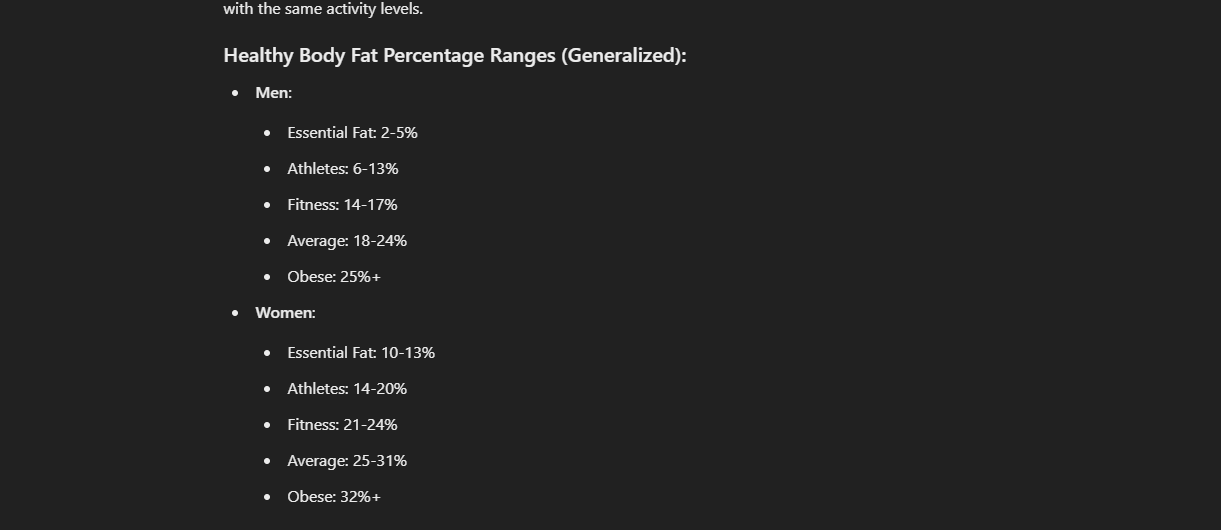

In [8]:
def categorize_fat(row):
    # Male
    if row['Gender'] == 'Male':
        if row['Fat_Percentage'] >= 2 and row['Fat_Percentage'] <= 5:
            return 'Essential Fat'
        elif row['Fat_Percentage'] >= 6 and row['Fat_Percentage'] <= 13:
            return 'Super Lean'
        elif row['Fat_Percentage'] >= 14 and row['Fat_Percentage'] <= 17:
            return 'Lean'
        elif row['Fat_Percentage'] >= 18 and row['Fat_Percentage'] <= 24:
            return 'Average'
        else:
            return 'High Fat'
    # Female
    else:
        if row['Fat_Percentage'] >= 10 and row['Fat_Percentage'] <= 13:
            return 'Essential Fat'
        elif row['Fat_Percentage'] >= 14 and row['Fat_Percentage'] <= 20:
            return 'Super Lean'
        elif row['Fat_Percentage'] >= 21 and row['Fat_Percentage'] <= 24:
            return 'Lean'
        elif row['Fat_Percentage'] >= 25 and row['Fat_Percentage'] <= 31:
            return 'Average'
        else:
            return 'High Fat'

df['Fat_category'] = df.apply(categorize_fat, axis=1) 
df.sample(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Fat_category
900,30,Male,120.3,1.96,171,136,65,0.66,494.0,Yoga,23.9,2.6,2,1,31.32,Average
419,47,Male,86.6,1.99,182,153,70,1.98,1500.0,Strength,10.6,3.5,4,3,21.87,Super Lean
16,19,Female,64.0,1.53,166,167,58,1.33,1111.0,HIIT,29.8,2.3,3,2,27.34,Average
401,42,Female,42.7,1.74,161,130,71,1.04,608.0,Strength,32.9,1.6,3,1,14.10,High Fat
101,25,Female,41.2,1.62,193,144,64,1.49,1073.0,Yoga,28.9,2.1,4,2,15.70,Average
282,24,Female,42.0,1.75,174,144,55,0.83,598.0,Strength,31.8,2.3,3,1,13.71,High Fat
385,59,Female,42.1,1.65,172,132,59,1.22,725.0,Strength,33.0,2.2,2,1,15.46,High Fat
523,48,Female,56.8,1.51,185,126,52,1.37,777.0,HIIT,32.1,2.1,4,2,24.91,High Fat
707,40,Female,70.0,1.55,171,163,74,0.85,693.0,Yoga,31.1,1.5,3,1,29.14,High Fat
313,41,Female,76.7,1.79,172,132,56,1.40,832.0,Yoga,34.0,2.0,4,2,23.94,High Fat


### Pie Chart

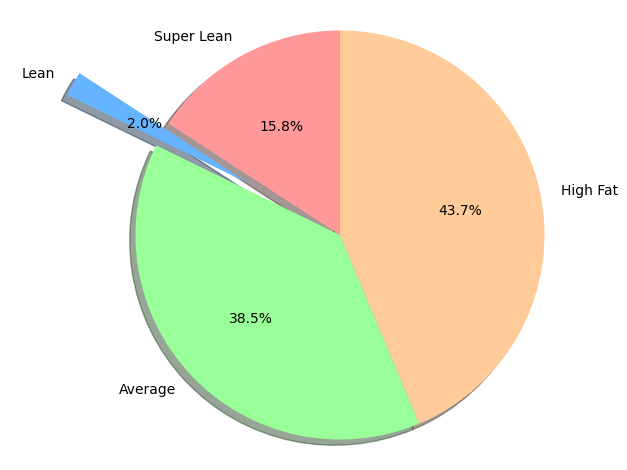

In [9]:
# Calculate counts for each category
super_lean = df.loc[df['Fat_category'] == 'Super Lean'].shape[0]
lean = df.loc[df['Fat_category'] == 'Lean'].shape[0]
average = df.loc[df['Fat_category'] == 'Average'].shape[0]
high_fat = df.loc[df['Fat_category'] == 'High Fat'].shape[0]

# Pie chart
labels = ['Super Lean', 'Lean', 'Average', 'High Fat']
sizes = [super_lean, lean, average, high_fat]
explodes = (0, 0.5, 0, 0)

# Add colors and explode for visualization
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explodes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [10]:
strength_avg_cal = (df['Calories_Burned'].loc[df['Workout_Type'] == 'Strength'] / df['Session_Duration (hours)']).mean()
print("Strength : ", strength_avg_cal)

cardio_avg_cal = (df['Calories_Burned'].loc[df['Workout_Type'] == 'Cardio'] / df['Session_Duration (hours)']).mean()
print("Cardio : ", cardio_avg_cal)

yoga_avg_cal = (df['Calories_Burned'].loc[df['Workout_Type'] == 'Yoga'] / df['Session_Duration (hours)']).mean()
print("Yoga : ", yoga_avg_cal)

hiit_avg_cal = (df['Calories_Burned'].loc[df['Workout_Type'] == 'HIIT'] / df['Session_Duration (hours)']).mean()
print("HIIT : ", hiit_avg_cal)

Strength :  723.9950441252573
Cardio :  723.8479923442371
Yoga :  716.5192284403885
HIIT :  716.5150989407075


## SCATTER PLOTS

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

['Yoga' 'HIIT' 'Cardio' 'Strength']
0      0
1      1
2      2
3      3
4      3
      ..
968    3
969    3
970    2
971    1
972    3
Name: Workout_Type, Length: 973, dtype: int64


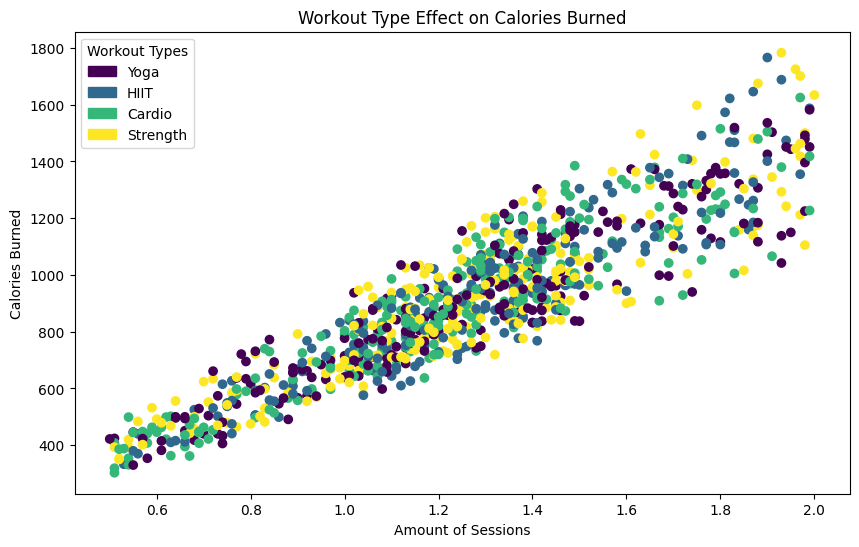

In [14]:
import matplotlib.patches as mpatches

# Define workout types and their corresponding colors
workout_types = df['Workout_Type'].unique()
print(workout_types)
workout_type_to_color = {wt: i for i, wt in enumerate(workout_types)}
t = df['Workout_Type'].map(workout_type_to_color)
print(t)

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Session_Duration (hours)'], df['Calories_Burned'], c=t, alpha=1, cmap='viridis')
# Add labels and title
plt.xlabel('Amount of Sessions')
plt.ylabel('Calories Burned')
plt.title('Workout Type Effect on Calories Burned')

# Create a legend
# mpathes.Patch it would just create the legend
# scatter.map is the colormap from the cmap viridis which we set and map the normalized values to actual colors
# scatter.norm is to normalize the number from the workout_type_to_color to range 0 to 1
handles = [
    mpatches.Patch(color=scatter.cmap(scatter.norm(workout_type_to_color[wt])), label=wt)
    for wt in workout_types
]

plt.legend(handles=handles, title="Workout Types", loc="upper left")  # Customize title and position

# Show the plot
plt.show()

In [15]:
# change gender class to int
def change_category_int(row):
    if row == 'Male':
        return 1
    else:
        return 0

df['Gender'] = df['Gender'].apply(change_category_int)
df.sample(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Fat_category
712,19,1,82.4,1.96,174,169,62,1.90,1766.0,HIIT,10.1,3.5,5,3,21.45,Super Lean
417,45,0,48.2,1.64,168,159,67,1.25,894.0,Strength,32.1,2.5,4,2,17.92,High Fat
650,47,0,43.4,1.62,179,132,64,0.51,303.0,Cardio,25.3,2.3,3,1,16.54,Average
676,20,1,111.0,1.94,170,156,50,1.02,875.0,Cardio,27.6,3.3,4,2,29.49,High Fat
602,52,0,70.6,1.69,165,135,65,1.36,826.0,HIIT,26.1,2.2,3,1,24.72,Average
890,53,1,73.4,1.76,169,151,70,1.09,815.0,Yoga,27.9,2.8,3,2,23.70,High Fat
808,42,0,72.9,1.62,175,139,67,1.17,732.0,Yoga,25.7,2.0,4,2,27.78,Average
127,43,0,57.3,1.79,175,166,62,1.98,1479.0,Yoga,17.8,2.7,4,3,17.88,Super Lean
764,22,0,40.3,1.56,192,121,57,1.45,877.0,HIIT,30.8,2.1,4,2,16.56,Average
162,20,1,101.0,1.91,179,143,58,1.36,1070.0,Cardio,29.3,2.7,3,2,27.69,High Fat


In [16]:
# change workout Type to int
def change_wt_int(row):
    if row == 'Cardio':
        return 0
    elif row == 'Strength':
        return 1
    elif row == 'Yoga':
        return 2
    else:
        return 3
    
df['Workout_Type'] = df['Workout_Type'].apply(change_wt_int)
df.sample(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Fat_category
278,31,0,63.1,1.64,184,125,51,1.54,962.0,0,19.0,2.7,4,3,23.46,Super Lean
824,20,0,44.2,1.61,177,122,69,1.08,659.0,3,32.4,2.5,2,1,17.05,High Fat
915,48,1,73.1,1.83,194,131,71,1.05,681.0,2,28.0,2.8,4,2,21.83,High Fat
349,30,1,64.1,1.87,182,142,67,0.64,500.0,2,26.2,2.1,2,1,18.33,High Fat
928,25,0,63.8,1.68,198,165,67,0.95,784.0,0,31.6,1.9,2,1,22.60,High Fat
751,25,0,57.7,1.58,188,145,52,1.36,986.0,2,25.7,2.2,3,2,23.11,Average
422,33,0,58.0,1.53,180,126,50,1.84,1159.0,1,18.3,2.7,5,3,24.78,Super Lean
897,40,1,80.3,1.76,168,167,74,1.63,1497.0,1,13.1,3.5,5,3,25.92,High Fat
89,34,0,75.6,1.60,193,130,51,0.64,416.0,3,29.1,2.7,2,1,29.53,Average
605,35,1,85.6,1.85,185,135,55,1.78,1322.0,1,14.5,3.5,5,3,25.01,Lean


In [27]:
# drop unnecessary features
new_df = df.drop(columns=['Resting_BPM', 'Height (m)', 'Experience_Level', 'BMI', 'Water_Intake (liters)', 'Fat_category'])

In [28]:
new_df.head()

,Age,Gender,Weight (kg),Max_BPM,Avg_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Workout_Frequency (days/week)
0,56,1,88.3,180,157,1.69,1313.0,2,12.6,4
1,46,0,74.9,179,151,1.30,883.0,3,33.9,4
2,32,0,68.1,167,122,1.11,677.0,0,33.4,4
3,25,1,53.2,190,164,0.59,532.0,1,28.8,3
4,38,1,46.1,188,158,0.64,556.0,1,29.2,3


### Apply Normalization

In [ ]:
# we want the range of our datasets to be 0 and 1
new_df.describe()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Workout_Frequency (days/week)
count,973.000000,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,0.525180,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,1.437821,24.976773,3.321686
std,12.180928,0.499622,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,1.107163,6.259419,0.913047
min,18.000000,0.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,0.000000,10.000000,2.000000
25%,28.000000,0.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,0.000000,21.300000,3.000000
50%,40.000000,1.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,1.000000,26.200000,3.000000
75%,49.000000,1.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,2.000000,29.300000,4.000000
max,59.000000,1.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,3.000000,35.000000,5.000000


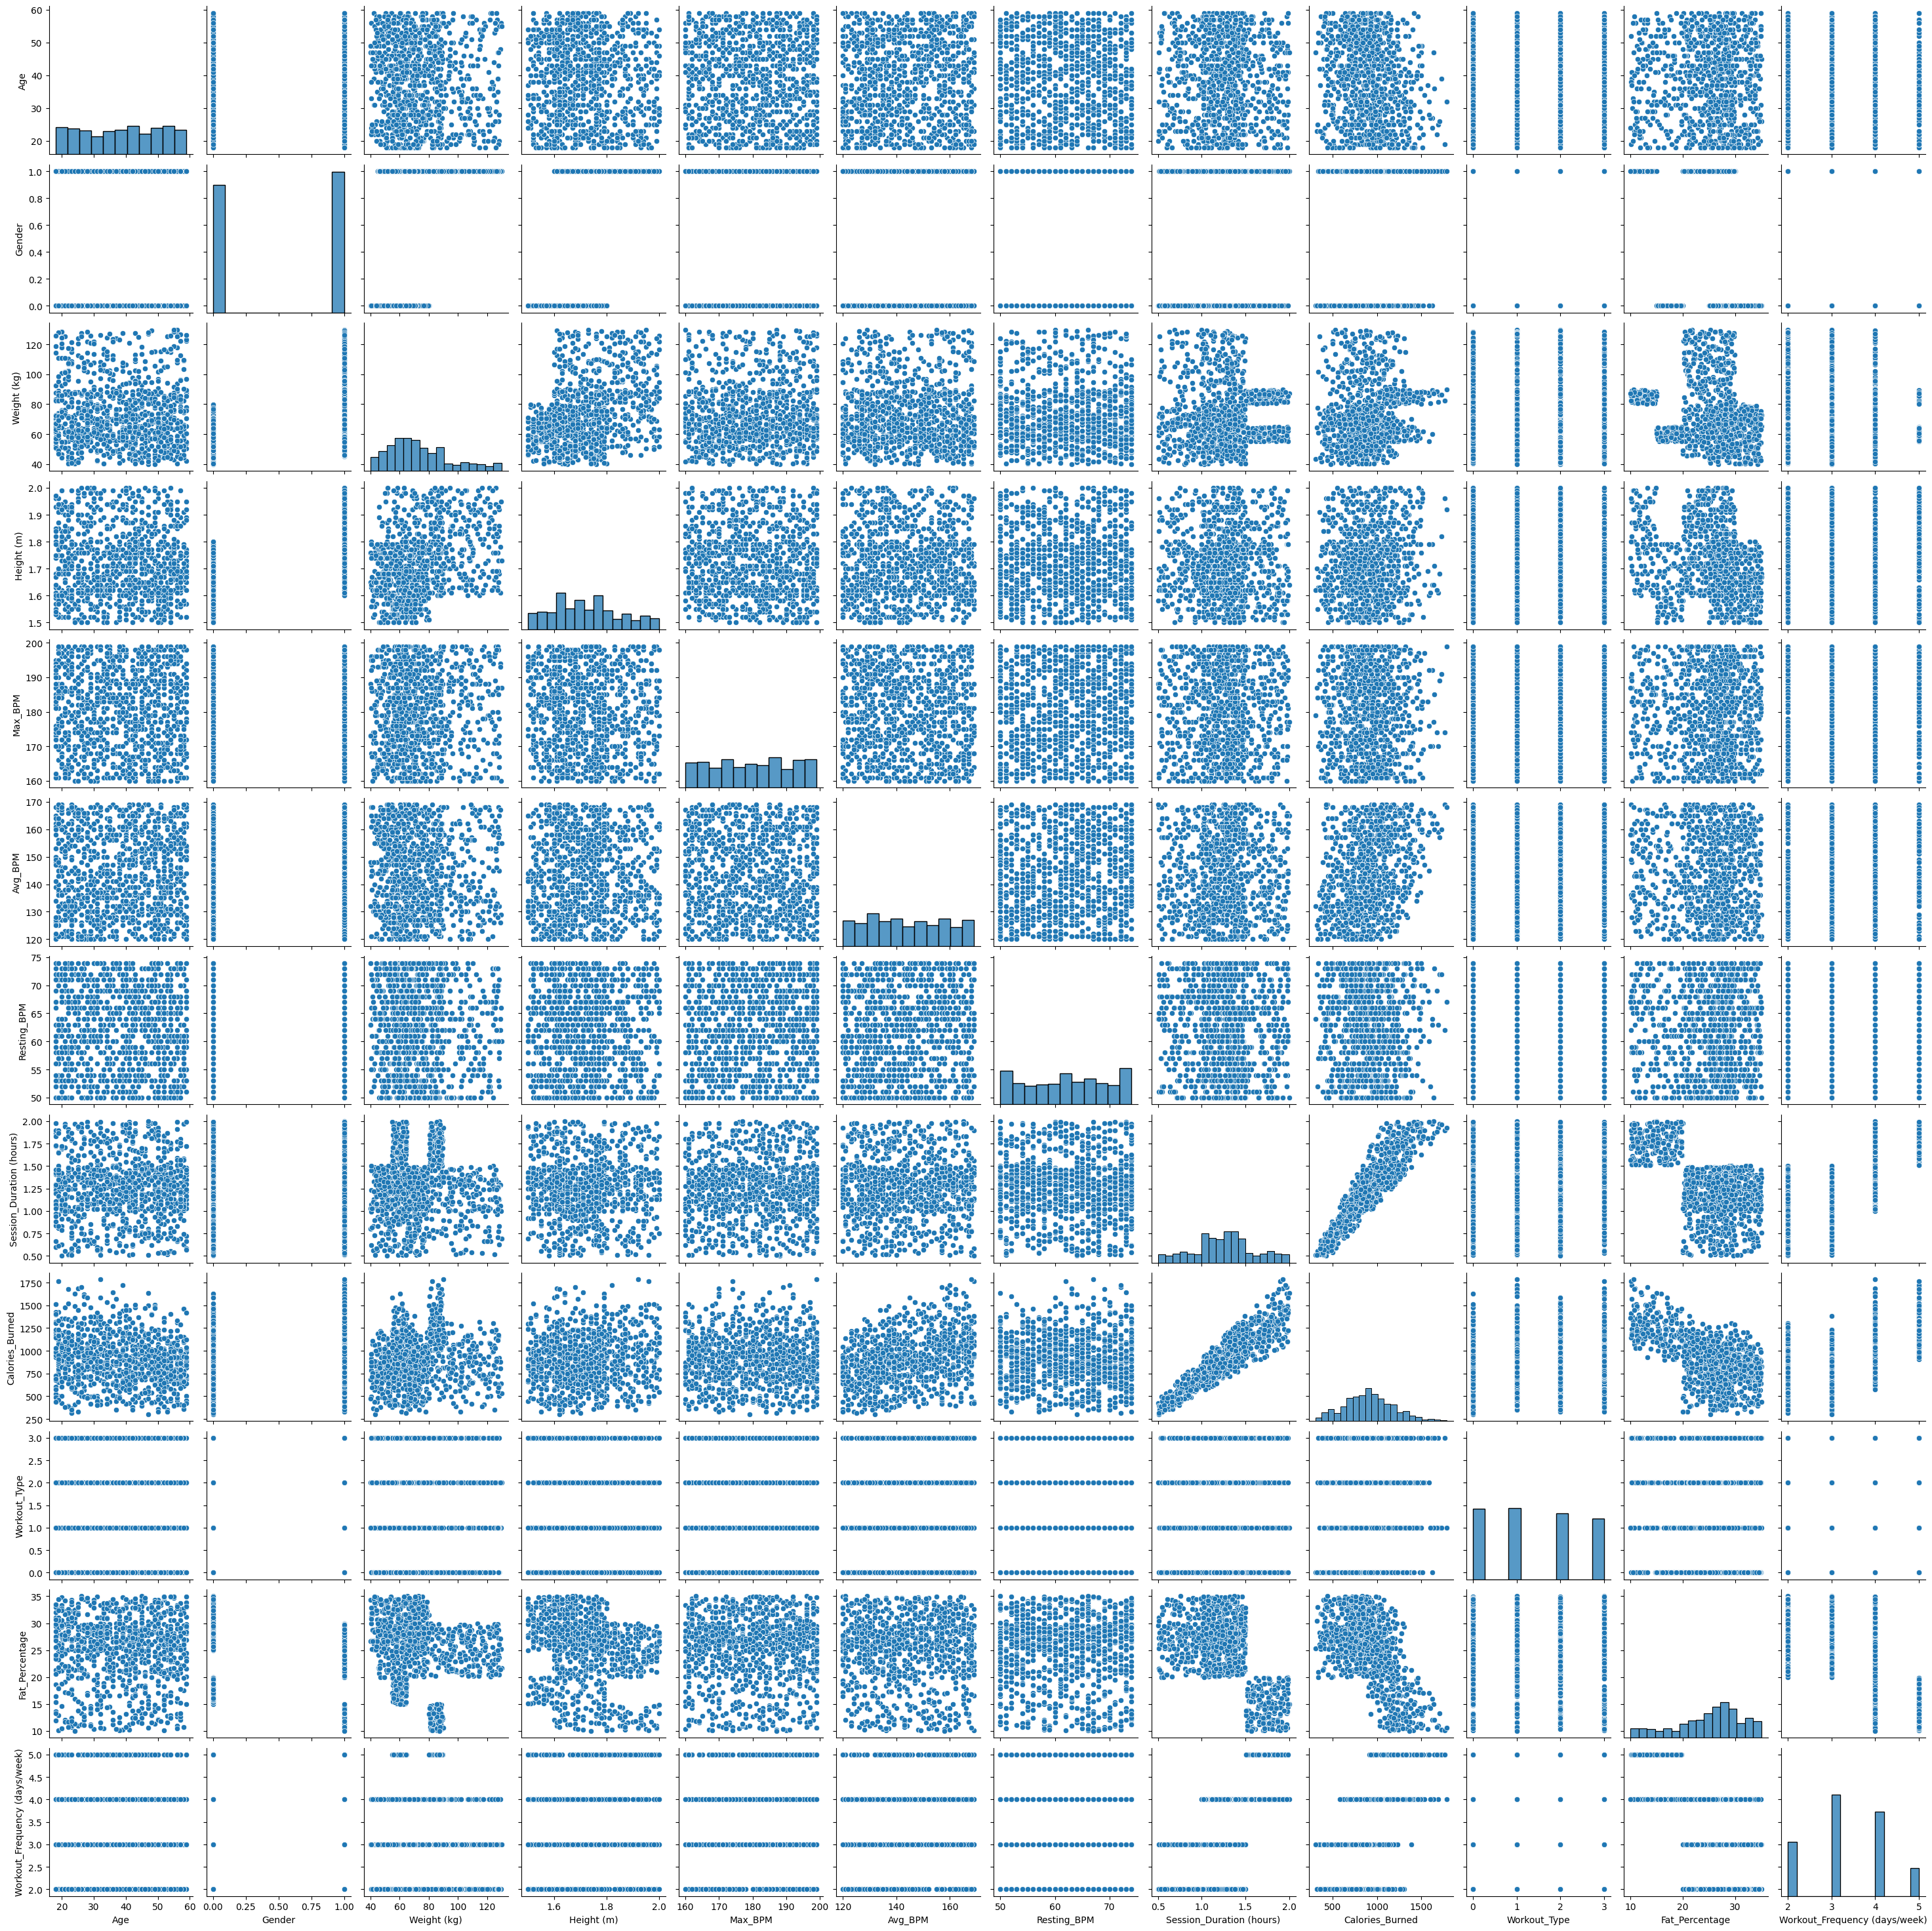

In [22]:
# visualize our data to pairplot using seaborn from sklearn
sns.pairplot(new_df)

In [101]:
# splitting variables
y = new_df.iloc[:, 8] # dependent value
x = new_df.drop(columns=['Calories_Burned'], axis=1) # independent value
x

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week)
0,56,1,88.3,1.71,180,157,60,1.69,2,12.6,3.5,4
1,46,0,74.9,1.53,179,151,66,1.30,3,33.9,2.1,4
2,32,0,68.1,1.66,167,122,54,1.11,0,33.4,2.3,4
3,25,1,53.2,1.70,190,164,56,0.59,1,28.8,2.1,3
4,38,1,46.1,1.79,188,158,68,0.64,1,29.2,2.8,3
...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,1,87.1,1.74,187,158,67,1.57,1,10.0,3.5,4
969,25,1,66.6,1.61,184,166,56,1.38,1,25.0,3.0,2
970,59,0,60.4,1.76,194,120,53,1.72,0,18.8,2.7,5
971,32,1,126.4,1.83,198,146,62,1.10,3,28.2,2.1,3


In [102]:
y.sample(18)

468     779.0
529    1314.0
661     856.0
26      502.0
89      416.0
622    1355.0
30      964.0
84      744.0
325     714.0
343    1187.0
714    1060.0
354     442.0
353     525.0
297     979.0
317     742.0
411     440.0
956     838.0
694     909.0
Name: Calories_Burned, dtype: float64

In [103]:
# Splitting data into Train/Test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [104]:
# Model
regressor = LinearRegression()
regressor.fit(x_train, y_train) 

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = regressor.predict(x_train)
y_pred_test = regressor.predict(x_test)

# valuate the accuracy of the model
r2_train = regressor.score(x_train, y_train)
r2_test = regressor.score(x_test, y_test)

print(f"R2 score on training data : {r2_train}")
print(f"R2 score on test data : {r2_test}")

Y train : 
1086.7517289374778
Y test : 
1067.3254548987936
